In [138]:
import pandas as pd

# Đường dẫn đến file dữ liệu
file_path = '/content/combined_data_safe.csv'

# Đọc dữ liệu từ file CSV
new_data = pd.read_csv(file_path)

# Hiển thị nội dung đầu tiên của DataFrame
new_data.head()

,timestamp,oa_temp,room_temp_Mf-1-1,room_temp_Mf-1-2,room_temp_Mf-1-3,room_temp_Mf-2-1-1,room_temp_Mf-2-1-2,room_temp_Mf-2-1-3,room_temp_Mf-2-1-4,room_temp_Ac-2-1,...,dew_temp_Mf-2-1,dew_temp_Ac-2-2,dew_temp_Ac-2-3,dew_temp_Ac-2-4,dew_temp_Ac-2-5,fan_stat_Ac-2-1,fan_stat_Ac-2-2,fan_stat_Ac-2-3,fan_stat_Ac-2-4,fan_stat_Ac-2-5
0,1699574948,16.3,21.5,21.7,22.0,23.9,24.3,22.7,22.7,22.6,...,14.3,14.3,14.3,14.3,14.3,0.0,0.0,0.0,0.0,0.0
1,1699576148,16.2,21.4,21.6,21.9,23.8,24.2,22.6,22.6,22.5,...,14.2,14.2,14.2,14.2,14.2,0.0,0.0,0.0,0.0,0.0
2,1699577348,16.1,21.4,21.5,21.9,23.7,24.2,22.6,22.5,22.4,...,14.1,14.1,14.1,14.1,14.1,0.0,0.0,0.0,0.0,0.0
3,1699578548,16.0,21.3,21.4,21.8,23.7,24.1,22.5,22.4,22.3,...,14.0,14.0,14.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0
4,1699579748,15.7,21.3,21.3,21.8,23.6,24.0,22.4,22.2,22.2,...,13.5,13.5,13.5,13.5,13.5,0.0,0.0,0.0,0.0,0.0


In [139]:
# prompt: convert Unix timestamp in new_dât dataframe to a new column of date time format

new_data['datetime'] = pd.to_datetime(new_data['timestamp'], unit='s')

new_data['datetime']

0     2023-11-10 00:09:08
1     2023-11-10 00:29:08
2     2023-11-10 00:49:08
3     2023-11-10 01:09:08
4     2023-11-10 01:29:08
              ...        
283   2023-11-11 22:39:08
284   2023-11-11 22:59:08
285   2023-11-11 23:19:07
286   2023-11-11 23:39:08
287   2023-11-11 23:59:08
Name: datetime, Length: 288, dtype: datetime64[ns]

In [140]:
import numpy as np

# Chỉ lấy hai cột đầu tiên
oa_temp = new_data.iloc[:, :2]
print(oa_temp.isna().sum())
oa_temp = oa_temp.fillna(method='ffill').fillna(method='bfill')
print(oa_temp.isna().sum())
oa_temp = oa_temp.rename(columns={'oa_temp': 'value'})

timestamp      0
oa_temp      144
dtype: int64
timestamp    0
oa_temp      0
dtype: int64


Epoch 1/100
310/310 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.0632
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2290 - accuracy: 0.0627
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2098 - accuracy: 0.0523
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2019 - accuracy: 0.0547
Epoch 5/100
310/310 [==============================] - 1s 3ms/step - loss: 0.1971 - accuracy: 0.0518
Epoch 6/100
310/310 [==============================] - 1s 3ms/step - loss: 0.1995 - accuracy: 0.0511
Epoch 7/100
310/310 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.0559
Epoch 8/100
310/310 [==============================] - 1s 2ms/step - loss: 0.1937 - accuracy: 0.0514
Epoch 9/100
310/310 [==============================] - 1s 2ms/step - loss: 0.1937 - accuracy: 0.0657
Epoch 10/100
310/310 [==============================] - 1s 3ms/step - loss: 0.1910 - accura

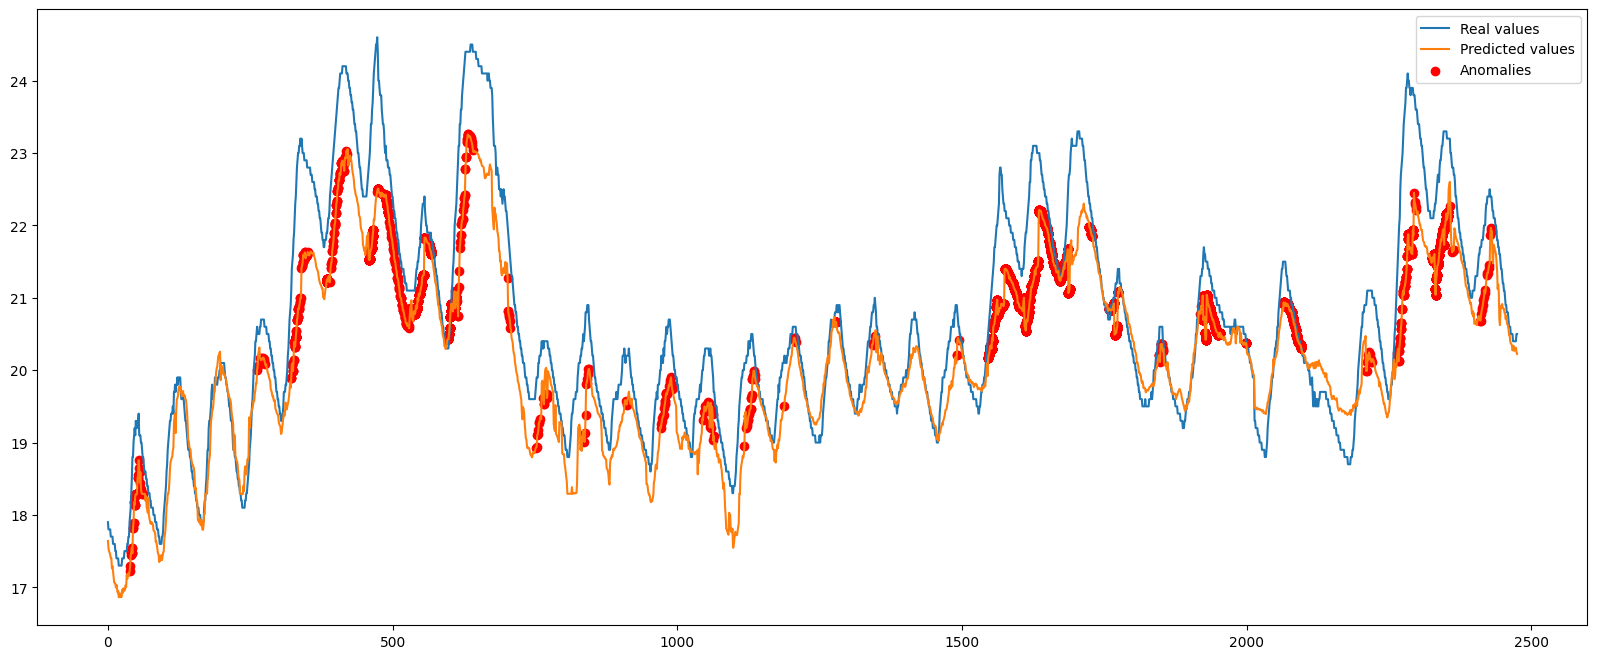

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Đường dẫn đến file dữ liệu
file_path = '../dataset/converted_data.csv'

# Đọc dữ liệu từ file CSV
new_data = pd.read_csv(file_path)

# Chỉ lấy các cột cần thiết
selected_data = new_data

# Xóa các giá trị NaN
selected_data = selected_data.dropna()

# Chuyển đổi dữ liệu về dạng chuẩn
scaler = StandardScaler()
selected_data_scaled = scaler.fit_transform(selected_data.drop('timestamp', axis=1))

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = selected_data_scaled[:int(len(selected_data_scaled)*0.8)]
X_test = selected_data_scaled[int(len(selected_data_scaled)*0.8):]

# Tạo mô hình autoencoder
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(73, activation='linear'))  # Số nơ-ron ở lớp này phải bằng với số tính năng đầu vào

# Khởi tạo bộ tối ưu hóa và hàm mất mát
optimizer = Adam(learning_rate=0.001)
loss = MeanSquaredError()

# Đánh giá mô hình
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, X_train, epochs=100, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
model.evaluate(X_test, X_test)

# Tính toán độ lệch chuẩn của các dự đoán
y_pred = model.predict(X_test)
y_pred_std = scaler.inverse_transform(y_pred)
y_test_std = scaler.inverse_transform(X_test)
std = np.std(y_pred_std - y_test_std)

# Tìm các điểm bất thường
anomaly_scores = np.abs(y_pred_std - y_test_std)
anomalies = np.where(anomaly_scores > 3*std)[0]

# Vẽ đồ thị
plt.figure(figsize=(20, 8))  # Đặt kích thước biểu đồ là 15x8 inch
plt.plot(y_test_std[:, 0], label='Real values')  # Chỉ sử dụng một cột để vẽ
plt.plot(y_pred_std[:, 0], label='Predicted values')  # Chỉ sử dụng một cột để vẽ
plt.scatter(anomalies, y_pred_std[anomalies, 0], color='red', label='Anomalies')  # Chỉ sử dụng một cột và các chỉ số hợp lệ
plt.legend()
plt.show()



In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
new_data = pd.read_csv(file_path)

# Chỉ lấy các cột cần thiết và xóa các hàng có giá trị NaN
data = new_data.dropna()

# Chuyển đổi dữ liệu thành dạng số
data = data.astype('float32')

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Xây dựng mô hình autoencoder
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(X_train.shape[1], activation='linear')
])

# Compile và huấn luyện mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, X_train, epochs=100, batch_size=32)

# Sử dụng mô hình để phát hiện bất thường
reconstructed = model.predict(scaled_data)
mse = np.mean(np.power(scaled_data - reconstructed, 2), axis=1)
threshold = np.mean(mse) + 2 * np.std(mse)
outliers = np.where(mse > threshold)[0]

# In ra các mốc thời gian và các giá trị tương ứng bị phát hiện là bất thường
print("Timestamps and Values of Anomalies:")
for outlier_index in outliers:
    timestamp = data.iloc[outlier_index]['timestamp']
    room_temp = data.iloc[outlier_index]['room_temp_Ac-2-1']
    dew_temp = data.iloc[outlier_index]['dew_temp_Ac-2-1']
    fan_stat = data.iloc[outlier_index]['fan_stat_Ac-2-1']
    print(f"Timestamp: {timestamp}, Room Temp: {room_temp}, Dew Temp: {dew_temp}, Fan Stat: {fan_stat}")

# Tính toán độ tương quan
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan
correlation_matrix = new_data.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap for Correlation Matrix')
plt.show()


Epoch 1/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0952
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 5/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 6/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 7/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 8/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 9/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 10/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 11/100
310/310 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 12/100
310/310 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 13/100


ModuleNotFoundError: No module named 'seaborn'

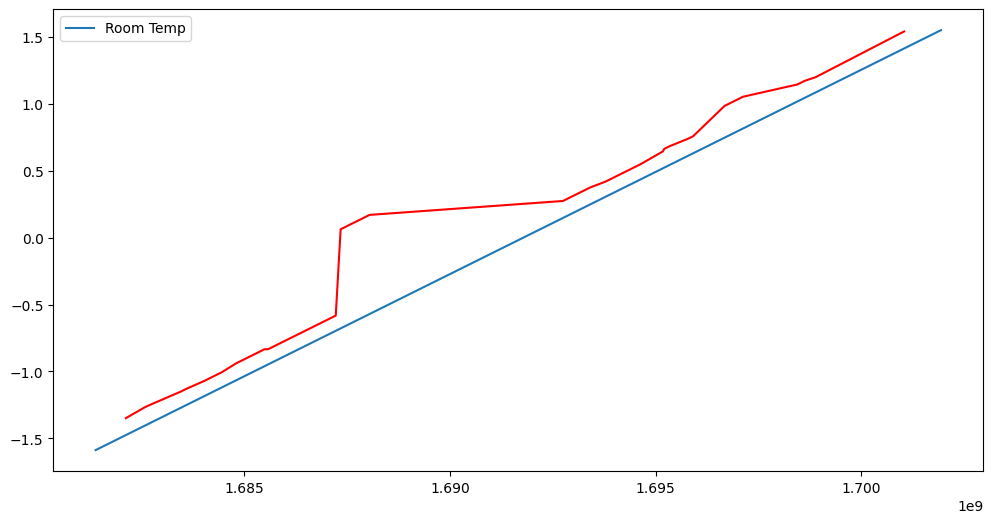

In [ ]:
# Vẽ biểu đồ các giá trị với điểm bất thường
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], scaled_data[:, 0], label='Room Temp')
plt.plot(data['timestamp'][outliers], scaled_data[outliers, 0], color='red')
plt.legend()
plt.show()

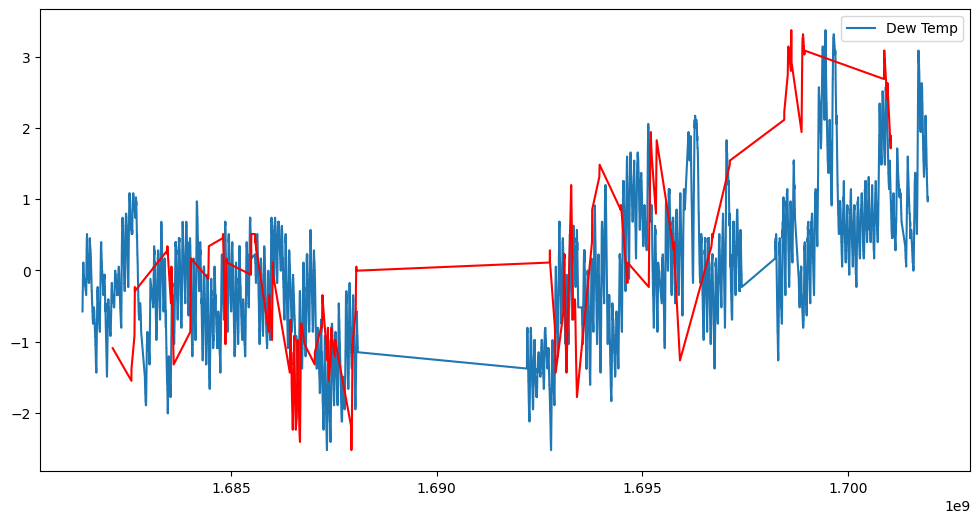

In [ ]:
# Vẽ biểu đồ các giá trị với điểm bất thường
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], scaled_data[:, 1], label='Dew Temp')
plt.plot(data['timestamp'][outliers], scaled_data[outliers, 1], color='red')
plt.legend()
plt.show()

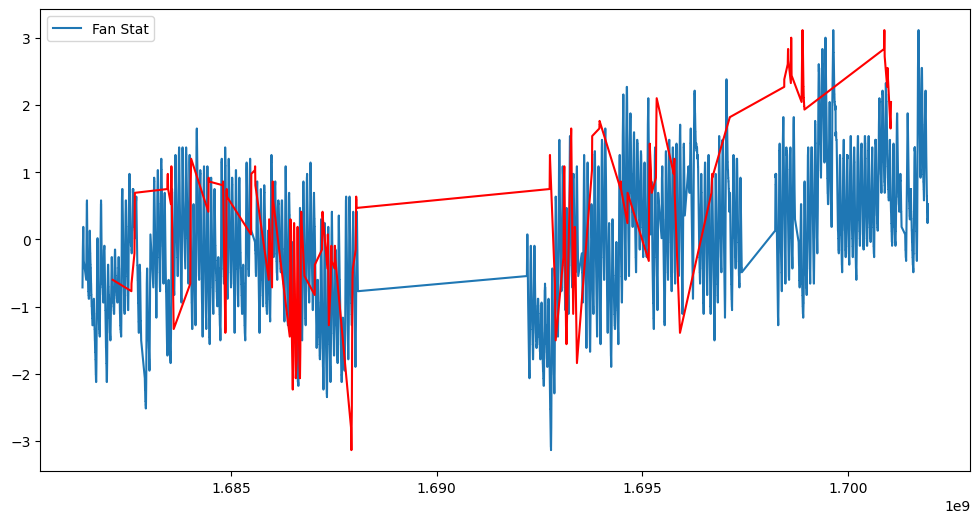

In [ ]:
# Vẽ biểu đồ các giá trị với điểm bất thường
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], scaled_data[:, 2], label='Fan Stat')
plt.plot(data['timestamp'][outliers], scaled_data[outliers, 2], color='red')
plt.legend()
plt.show()

In [160]:
import pandas as pd

# Tải dữ liệu từ file CSV
file_path = '/content/combined_data_safe.csv'
data = pd.read_csv(file_path)

# Chuyển đổi timestamps từ Unix sang datetime
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# Tạo đặc trưng thời gian: giờ trong ngày
data['hour'] = data['datetime'].dt.hour

# Giả sử giờ hoạt động của tòa nhà là từ 8:00 sáng đến 6:00 chiều (8 - 18 giờ)
start_hour = 8
end_hour = 18

# Lọc dữ liệu chỉ trong khoảng giờ hoạt động
operating_hours_data = data[(data['hour'] >= start_hour) & (data['hour'] <= end_hour)]

# In ra một số dòng dữ liệu để kiểm tra
operating_hours_data


,timestamp,oa_temp,room_temp_Mf-1-1,room_temp_Mf-1-2,room_temp_Mf-1-3,room_temp_Mf-2-1-1,room_temp_Mf-2-1-2,room_temp_Mf-2-1-3,room_temp_Mf-2-1-4,room_temp_Ac-2-1,...,dew_temp_Ac-2-3,dew_temp_Ac-2-4,dew_temp_Ac-2-5,fan_stat_Ac-2-1,fan_stat_Ac-2-2,fan_stat_Ac-2-3,fan_stat_Ac-2-4,fan_stat_Ac-2-5,datetime,hour
24,1699603748,18.5,20.3,20.2,20.8,22.6,22.8,21.2,20.9,21.1,...,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,2023-11-10 08:09:08,8
25,1699604948,19.3,20.4,20.4,20.9,22.6,22.8,21.3,21.0,21.2,...,15.4,15.4,15.4,0.0,0.0,0.0,0.0,0.0,2023-11-10 08:29:08,8
26,1699606148,20.4,20.5,20.5,21.0,22.6,22.8,21.5,21.2,21.4,...,15.8,15.8,15.8,0.0,0.0,0.0,0.0,0.0,2023-11-10 08:49:08,8
27,1699607348,22.0,20.6,20.7,21.1,22.9,22.9,21.8,21.3,21.6,...,16.5,16.5,16.5,0.0,0.0,0.0,0.0,0.0,2023-11-10 09:09:08,9
28,1699608548,23.3,20.8,20.9,21.3,23.1,23.1,22.0,21.5,21.9,...,16.8,16.8,16.8,0.0,0.0,0.0,0.0,0.0,2023-11-10 09:29:08,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1699724348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-11 17:39:08,17
269,1699725548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-11 17:59:08,17
270,1699726748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-11 18:19:08,18
271,1699727948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-11 18:39:08,18


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

# Chọn và chuẩn bị dữ liệu
features = ['room_temp_Ac-2-1', 'slab_temp_Ac-2-1', 'oa_temp', 'fan_stat_Ac-2-1', 'dew_temp_Ac-2-1']
data_for_model = operating_hours_data[features].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_model)

# Tạo chuỗi dữ liệu
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, 0]  # Giả sử chúng ta muốn dự đoán nhiệt độ phòng
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Dự đoán và phân tích bất thường có thể được thực hiện sau khi huấn luyện mô hình


Để xem xét ma trận tương quan giữa các biến trong khoảng thời gian khác nhau và phát hiện những thay đổi đáng chú ý trong mối quan hệ giữa chúng, bạn có thể sử dụng một đoạn code Python như sau. Đoạn code này sẽ chia dữ liệu theo các khung thời gian (window) và tính toán ma trận tương quan cho mỗi khung thời gian:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
file_path = 'your_data.csv'  # Thay đổi đường dẫn file phù hợp
data = pd.read_csv(file_path)

# Giả sử cột 'timestamp' là thời gian và đã được sắp xếp
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Xác định khung thời gian cho phân tích, ví dụ: '1D' cho mỗi ngày
time_frame = '1D'

# Tính toán ma trận tương quan cho mỗi khung thời gian
unique_dates = data.index.normalize().unique()
correlation_matrices = {}

for date in unique_dates:
    # Lọc dữ liệu cho ngày hiện tại
    daily_data = data[date.strftime('%Y-%m-%d')]
    
    # Tính ma trận tương quan
    corr_matrix = daily_data.corr()
    correlation_matrices[date] = corr_matrix

# Vẽ heatmap cho ma trận tương quan của một ngày cụ thể (ví dụ: ngày đầu tiên)
example_date = unique_dates[0]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrices[example_date], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f'Correlation Matrix for {example_date}')
plt.show()

# Lặp qua và so sánh các ma trận tương quan nếu cần
# ...
